In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#Paths
train_dir = "Split_smol/train"
val_dir = "Split_smol/val"

In [4]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 696 images belonging to 9 classes.


In [7]:
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 181 images belonging to 9 classes.


In [8]:
# Model (MobileNetV2 transfer learning)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

9406464/9406464 [==============================] - 10s 1us/step


In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_gen.class_indices), activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
22/22 [==============================] - 32s 1s/step - loss: 1.8334 - accuracy: 0.3908 - val_loss: 1.2001 - val_accuracy: 0.5801
Epoch 2/10
22/22 [==============================] - 17s 754ms/step - loss: 1.0232 - accuracy: 0.6394 - val_loss: 0.9800 - val_accuracy: 0.6519
Epoch 3/10
22/22 [==============================] - 18s 793ms/step - loss: 0.9308 - accuracy: 0.6652 - val_loss: 0.9263 - val_accuracy: 0.6685
Epoch 4/10
22/22 [==============================] - 18s 822ms/step - loss: 0.8203 - accuracy: 0.7141 - val_loss: 1.0016 - val_accuracy: 0.6519
Epoch 5/10
22/22 [==============================] - 18s 819ms/step - loss: 0.6989 - accuracy: 0.7514 - val_loss: 0.8765 - val_accuracy: 0.7017
Epoch 6/10
22/22 [==============================] - 21s 936ms/step - loss: 0.6492 - accuracy: 0.7586 - val_loss: 0.8275 - val_accuracy: 0.6961
Epoch 7/10
22/22 [==============================] - 19s 852ms/step - loss: 0.6275 - accuracy: 0.7701 - val_loss: 0.8439 - val_accuracy: 0.7238
Ep

In [12]:
# Evaluate
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc*100:.2f}%")


6/6 [==============================] - 4s 486ms/step - loss: 0.8856 - accuracy: 0.7072
Validation Accuracy: 70.72%


In [13]:
# Predictions
y_true = val_gen.classes
y_pred = np.argmax(model.predict(val_gen), axis=-1)

print(classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))


6/6 [==============================] - 4s 436ms/step
                            precision    recall  f1-score   support

         Actinic keratosis       0.83      0.50      0.62        20
         Atopic Dermatitis       0.95      1.00      0.98        21
          Benign keratosis       0.81      0.85      0.83        20
            Dermatofibroma       0.67      0.40      0.50        20
         Melanocytic nevus       1.00      0.25      0.40        20
                  Melanoma       0.38      0.60      0.46        20
   Squamous cell carcinoma       0.44      0.85      0.58        20
Tinea Ringworm Candidiasis       1.00      0.95      0.97        20
           Vascular lesion       1.00      0.95      0.97        20

                  accuracy                           0.71       181
                 macro avg       0.79      0.71      0.70       181
              weighted avg       0.79      0.71      0.70       181



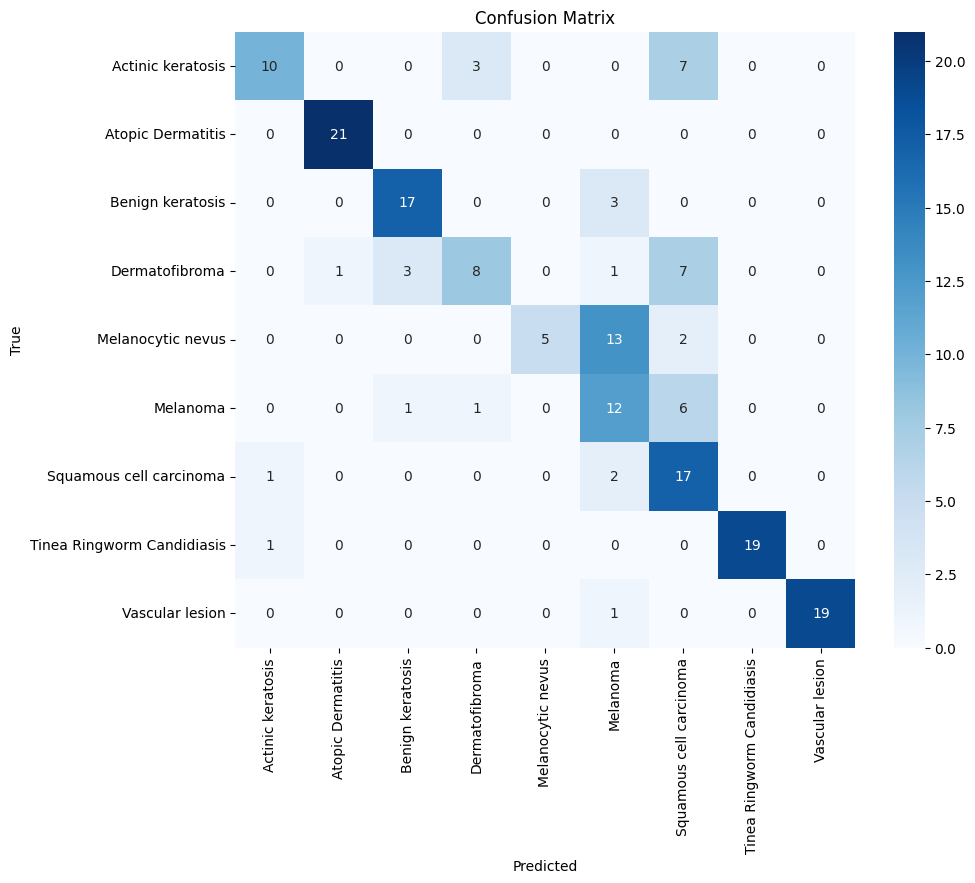

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_gen.class_indices.keys(), yticklabels=val_gen.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [15]:
# Save Model
model.save("skin_disease_model.h5")

c:\Users\hp\OneDrive\Desktop\Skin_disease_detection\venv310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


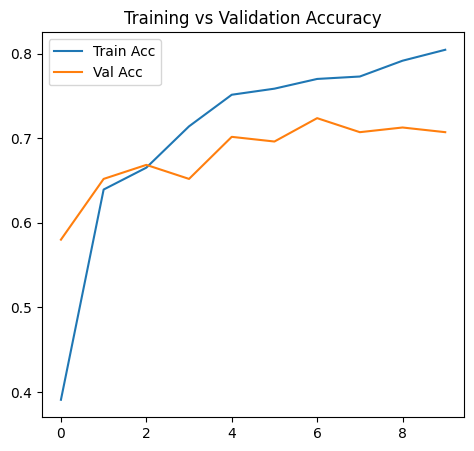

In [17]:
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

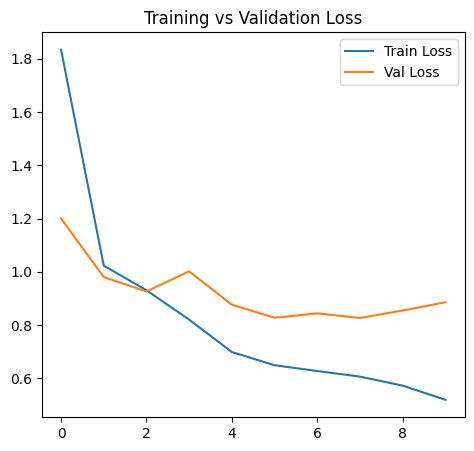

In [18]:
# Loss plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()